In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
table = pd.read_excel('drive/MyDrive/BIO_SH/Main Set K 2MAB 2 04092024 4310.xlsx',dtype = {'Дата исследования':'string','ID' : 'string'})
table

,№ пп,ID,Дата рождения,Пол (F/M),Дата исследования,Кол-во снимков,Сторона,"УЗИ Класс (1-Норма, 2-НЕ Норма)",Unnamed: 8,1,2,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,<NA>,NaN,NaN,<NA>,4.043152,NaN,NaN,NaN,0.348028,0.651972,NaN,NaN,NaN
2,NaN,<NA>,NaN,NaN,<NA>,4310.000000,NaN,NaN,NaN,1500.000000,2810.000000,4310,0.0,NaN
3,1.0,00058,2023-06-11 00:00:00,M,2024-02-06 00:00:00,1.000000,L,1.0,NaN,1.000000,NaN,NaN,0.0,NaN
4,NaN,<NA>,NaN,NaN,2024-02-06 00:00:00,1.000000,L,2.0,NaN,NaN,1.000000,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1990,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1991,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1992,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [ ]:
import cv2
import numpy as np
import os

# Функция для проверки наличия красного и синего цвета на изображении
def has_red_or_blue(image):
    # Определяем диапазоны красного и синего цветов в HSV
    red_range1 = np.array([0, 100, 100]), np.array([10, 255, 255])
    red_range2 = np.array([160, 100, 100]), np.array([180, 255, 255])
    blue_range = np.array([100, 100, 100]), np.array([140, 255, 255])

    # Конвертируем изображение в HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Создаем маски для красного и синего цветов
    mask_red1 = cv2.inRange(hsv, red_range1[0], red_range1[1])
    mask_red2 = cv2.inRange(hsv, red_range2[0], red_range2[1])
    mask_blue = cv2.inRange(hsv, blue_range[0], blue_range[1])

    # Объединяем маски
    mask = cv2.bitwise_or(mask_red1, mask_red2)
    mask = cv2.bitwise_or(mask, mask_blue)

    # Проверяем, есть ли ненулевые пиксели в маске
    return np.any(mask)

# Путь к папке с изображениями
input_folder = "drive/MyDrive/BIO_SH/НЕ НОРМА 040924"
#output_folder = 'path/to/save/filtered/images'

#if not os.path.exists(output_folder):
#    os.makedirs(output_folder)

images = []
images_f = []
# Проходим по изображениям в папке
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        if not has_red_or_blue(image):
            # Сохраняем изображение, если оно не содержит красных или синих всплесков
            #cv2.imwrite(os.path.join(output_folder, filename), image)
            #images_f.append(image)
            a = 1
        #images.append(image)

print("Изображения без красных и синих всплесков сохранены.")


In [ ]:
images

In [ ]:
import cv2
import os

# Директория с исходными изображениями
input_dir = "drive/MyDrive/BIO_SH/НЕ НОРМА 040924"

# Директория для сохранения обработанных изображений
output_dir = "drive/MyDrive/BIO_SH/all_img3"

# Создание выходной директории, если она не существует
os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(input_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Загрузка изображения
        img_path = os.path.join(input_dir, filename)
        img = cv2.imread(img_path)

        # Конвертация в оттенки серого
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Применение бинаризации для удаления цветных оверлеев
        _, threshold = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

        # Заполнение областей, окруженных белыми пикселями
        #contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #for cnt in contours:
         #   cv2.drawContours(gray, [cnt], 0, 255, -1)

        # Сохранение обработанного изображения
        #_, threshold = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

        output_path = os.path.join(output_dir, "neg_"+filename)
        cv2.imwrite(output_path, gray)


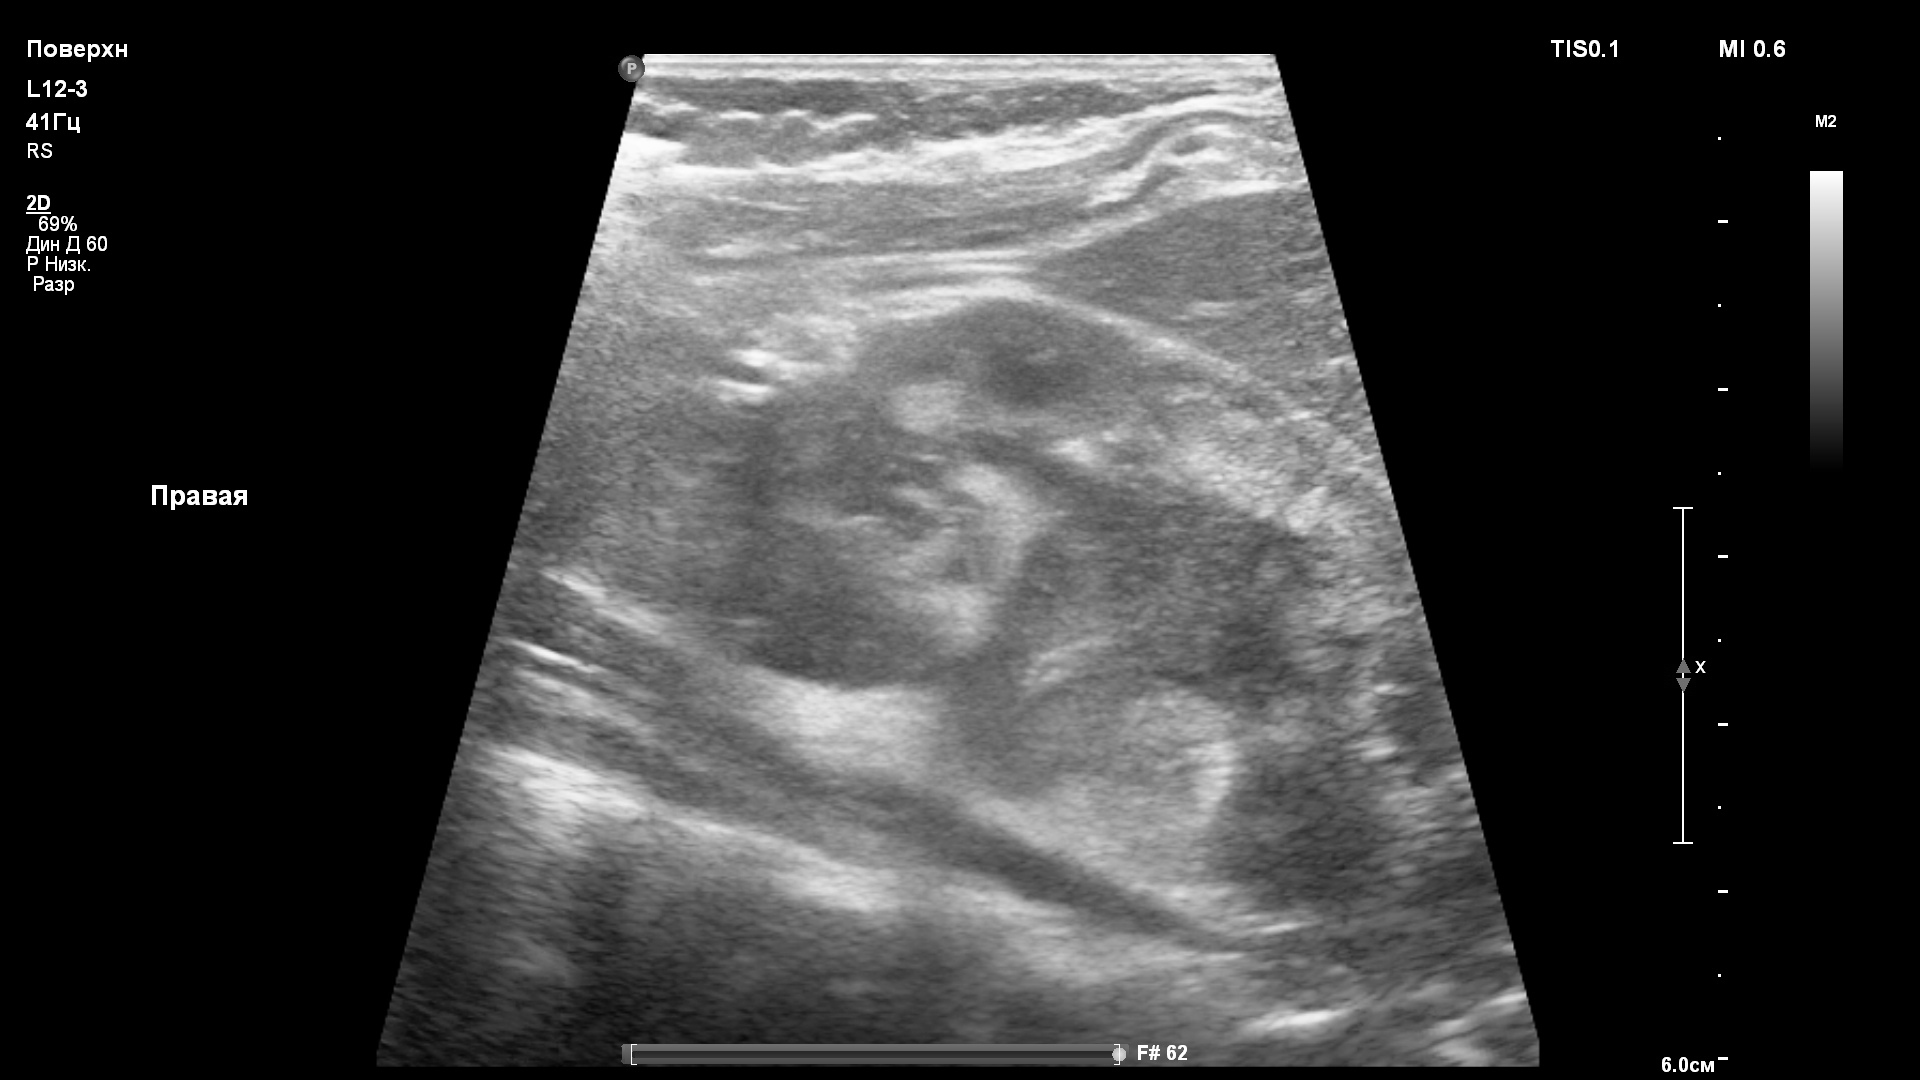

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow( gray)

In [ ]:
# Директория с исходными изображениями
input_dir = 'drive/MyDrive/BIO_SH/НОРМА 0409'

# Директория для сохранения обработанных изображений
output_dir = "drive/MyDrive/BIO_SH/all_img3"

# Создание выходной директории, если она не существует
os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(input_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Загрузка изображения
        img_path = os.path.join(input_dir, filename)
        img = cv2.imread(img_path)

        # Конвертация в оттенки серого
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Применение бинаризации для удаления цветных оверлеев
        _, threshold = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

        # Заполнение областей, окруженных белыми пикселями
        #contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #for cnt in contours:
         #   cv2.drawContours(gray, [cnt], 0, 255, -1)

        # Сохранение обработанного изображения
        output_path = os.path.join(output_dir, "pos_"+filename)
        cv2.imwrite(output_path, gray)

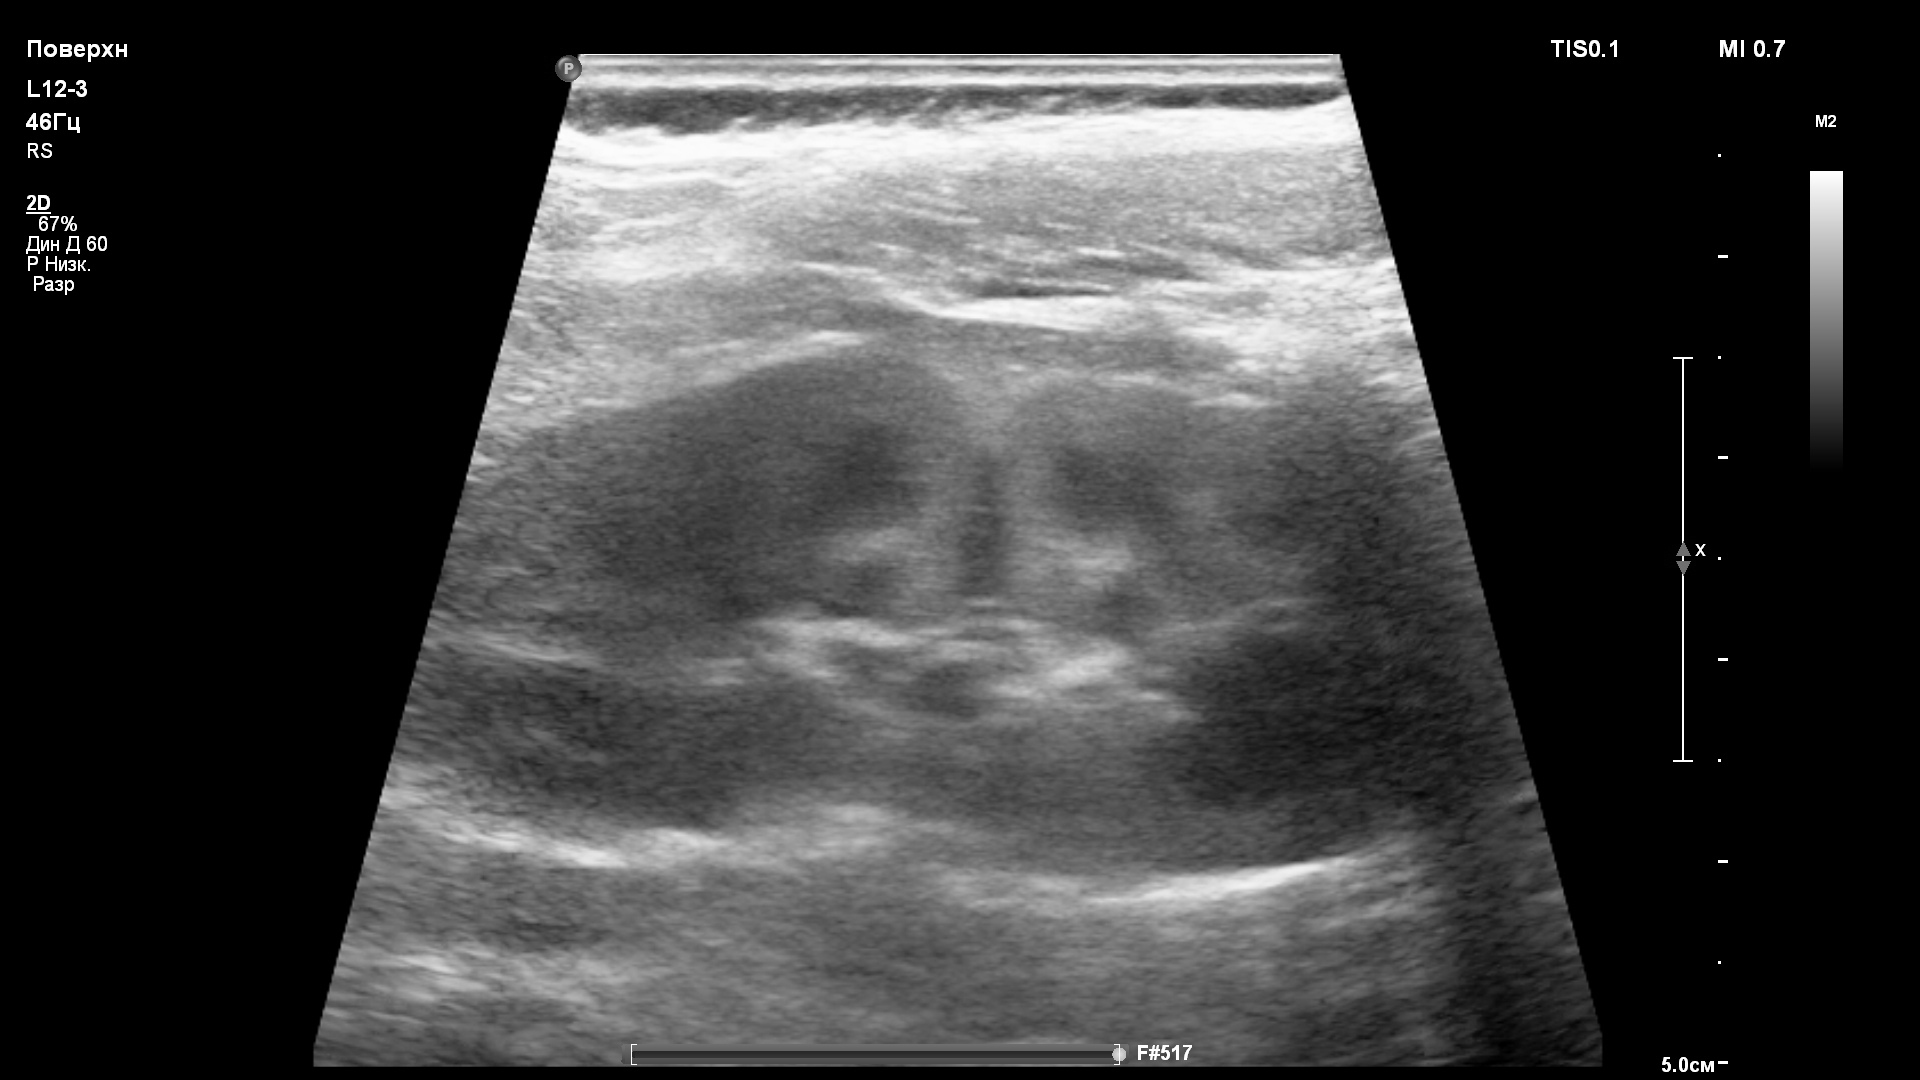

In [ ]:
cv2_imshow( gray)

In [ ]:
import cv2
import os
from PIL import Image
import numpy as np
folder_path_neg = 'drive/MyDrive/BIO_SH/НЕ НОРМА 040924'
folder_path_pos = 'drive/MyDrive/BIO_SH/НОРМА 0409'
target_size = (244, 244)

sizes = []

images_neg = []
neg_info = []
images_pos = []
pos_info = []
for filename in os.listdir(folder_path_neg):
    if filename.endswith('.jpg') or filename.endswith('.jpeg'):
        file_path = os.path.join(folder_path_neg, filename)
        f_mas = filename.split("_")
        id = f_mas[0]
        date = f_mas[1]
        rl = f_mas[2]
        a = table[table['ID'] == id]['Пол (F/M)'].values
        sx = a[0]
        neg_info.append((id,date,rl,sx))
        img = Image.open(file_path)
        sizes.append(np.array(img).shape)
        if(np.array(img).shape != (1080, 1920, 3)):
          continue
        img = img.resize(target_size)

        images_neg.append(np.array(img))

images_neg_array = np.array(images_neg)


for filename in os.listdir(folder_path_pos):
    if filename.endswith('.jpg') or filename.endswith('.jpeg'):
        file_path = os.path.join(folder_path_pos, filename)
        f_mas = filename.split("_")
        id = f_mas[0]
        date = f_mas[1]
        rl = f_mas[2]
        a = table[table['ID'] == id]['Пол (F/M)'].values
        sx = a[0]
        pos_info.append((id,date,rl,sx))
        img = Image.open(file_path)
        sizes.append(np.array(img).shape)
        if(np.array(img).shape != (1080, 1920, 3)):
          continue
        img = img.resize(target_size)

        images_pos.append(np.array(img))

images_pos_array = np.array(images_pos)

print(f'Количество изображений (НОРМА): {len(images_pos_array)}')
print(f'Количество изображений (НЕ НОРМА): {len(images_neg_array)}')

Количество изображений (НОРМА): 928
Количество изображений (НЕ НОРМА): 2077


In [ ]:
st = set(sizes)
print(st)
dct = {(590, 819, 3) : 0, (768, 1024, 3) : 0, (1080, 1920, 3) : 0}
for i in range(len(sizes)):
  dct[sizes[i]] += 1
print(dct)

{(590, 819, 3), (768, 1024, 3), (1080, 1920, 3)}
{(590, 819, 3): 13, (768, 1024, 3): 28, (1080, 1920, 3): 3005}


In [ ]:
import cv2
import numpy as np
images_pos_obr_array = []
# Функция для проверки наличия красного и синего цвета
def has_red_or_blue(image):
    # Определяем диапазоны красного и синего цветов в HSV
    red_range1 = np.array([0, 100, 100]), np.array([10, 255, 255])
    red_range2 = np.array([160, 100, 100]), np.array([180, 255, 255])
    blue_range = np.array([100, 100, 100]), np.array([140, 255, 255])

    # Конвертируем изображение в HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Создаем маски для красного и синего цветов
    mask_red1 = cv2.inRange(hsv, red_range1[0], red_range1[1])
    mask_red2 = cv2.inRange(hsv, red_range2[0], red_range2[1])
    mask_blue = cv2.inRange(hsv, blue_range[0], blue_range[1])

    # Объединяем маски
    mask = cv2.bitwise_or(mask_red1, mask_red2)
    mask = cv2.bitwise_or(mask, mask_blue)

    # Проверяем, есть ли ненулевые пиксели в маске
    return np.any(mask)

cnt_f = 0
cnt_n_f = 0
# Загружаем изображение
#image_path =  "drive/MyDrive/BIO_SH/НЕ НОРМА 040924"  # Замените на ваш путь к изображению
#image = cv2.imread(image_path)
for image in images_pos_array:
    # Вырезаем правую полосу размером 244 на 40
    right_strip = image[:, -40:, :]  # Все строки, последние 40 столбцов

    # Проверяем наличие красных и синих оттенков
    if has_red_or_blue(right_strip):
        #print("В правой полосе есть красные или синие оттенки.")
        cnt_f += 1
    else:
        #print("В правой полосе отсутствуют красные и синие оттенки.")
        cnt_n_f+=1
        images_pos_obr_array.append(image)



In [ ]:
images_neg_obr_array = []
# Функция для проверки наличия красного и синего цвета
def has_red_or_blue(image):
    # Определяем диапазоны красного и синего цветов в HSV
    red_range1 = np.array([0, 100, 100]), np.array([10, 255, 255])
    red_range2 = np.array([160, 100, 100]), np.array([180, 255, 255])
    blue_range = np.array([100, 100, 100]), np.array([140, 255, 255])

    # Конвертируем изображение в HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Создаем маски для красного и синего цветов
    mask_red1 = cv2.inRange(hsv, red_range1[0], red_range1[1])
    mask_red2 = cv2.inRange(hsv, red_range2[0], red_range2[1])
    mask_blue = cv2.inRange(hsv, blue_range[0], blue_range[1])

    # Объединяем маски
    mask = cv2.bitwise_or(mask_red1, mask_red2)
    mask = cv2.bitwise_or(mask, mask_blue)

    # Проверяем, есть ли ненулевые пиксели в маске
    return np.any(mask)

cnt_f = 0
cnt_n_f = 0
# Загружаем изображение
#image_path =  "drive/MyDrive/BIO_SH/НЕ НОРМА 040924"  # Замените на ваш путь к изображению
#image = cv2.imread(image_path)
for image in images_neg_array:
    # Вырезаем правую полосу размером 244 на 40
    right_strip = image[:, -40:, :]  # Все строки, последние 40 столбцов

    # Проверяем наличие красных и синих оттенков
    if has_red_or_blue(right_strip):
        #print("В правой полосе есть красные или синие оттенки.")
        cnt_f += 1
    else:
        #print("В правой полосе отсутствуют красные и синие оттенки.")
        cnt_n_f+=1
        images_neg_obr_array.append(image)

In [ ]:
#images_pos_obr_array = np.array(images_pos_obr_array)
#images_neg_obr_array = np.array(images_neg_obr_array)
print(f'Количество изображений (НОРМА): {len(images_pos_obr_array)}')
print(f'Количество изображений (НЕ НОРМА): {len(images_neg_obr_array)}')

Количество изображений (НОРМА): 797
Количество изображений (НЕ НОРМА): 1818


In [ ]:
from PIL import Image

cropped_pos = []
cropped_neg = []

for image in images_pos_obr_array:
    # Задаем координаты обрезки (left, upper, right, lower)
    left, upper, right, lower = 50, 50, 200, 200

    # Обрезка изображения
    cropped_image = image[upper:lower, left:right]
    cropped_pos.append(cropped_image)

for image in images_neg_obr_array:
    # Задаем координаты обрезки (left, upper, right, lower)
    left, upper, right, lower = 50, 50, 200, 200

    # Обрезка изображения
    cropped_image = image[upper:lower, left:right]
    cropped_neg.append(cropped_image)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
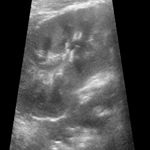

In [ ]:
cropped_pos[0]

In [ ]:
output_folder = 'drive/MyDrive/BIO_SH/OBR_data'

# Создание новой папки, если она не существует
os.makedirs(output_folder, exist_ok=True)
cnt = 1
# Перемещение изображений в новую папку
for img in cropped_pos:
    image = Image.fromarray(img)
    # Сохранение изображения в формате PNG
    image.save(output_folder + '/'+ "pos_"+str(cnt)+".png")
    cnt+=1
# Перемещение изображений в новую папку
cnt = 1
for img in cropped_neg:
    image = Image.fromarray(img)
    image.save(output_folder + '/'+ "neg_"+str(cnt)+".png")
    cnt+=1

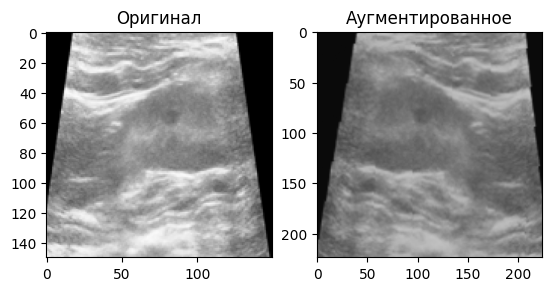

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Определяем преобразования
transform = transforms.Compose([
    transforms.RandomRotation(30),  # Случайное вращение изображения
    transforms.RandomHorizontalFlip(),  # Случайное горизонтальное отражение
    transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),  # Случайный обрез с изменением размера
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Изменение яркости, контрастности и насыщенности
    transforms.ToTensor(),  # Преобразование в тензор
])

# Загрузка изображения
img = Image.open('drive/MyDrive/BIO_SH/OBR_data/neg_100.png')  # Укажите путь к вашему изображению

# Применяем аугментации
augmented_img = transform(img)

# Переход к numpy для отображения
augmented_img = augmented_img.numpy()
augmented_img = augmented_img.transpose(1, 2, 0)  # Меняем порядок размерностей с (C, H, W) на (H, W, C)

# Отображаем оригинальное и аугментированное изображение
plt.subplot(1, 2, 1)
plt.title("Оригинал")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title("Аугментированное")
plt.imshow(augmented_img)
plt.show()


In [ ]:
import os
from PIL import Image
from torchvision import transforms

# Задайте пути к папкам
input_dir = 'drive/MyDrive/BIO_SH/OBR_data'  # Папка с исходными изображениями
output_dir = 'drive/MyDrive/BIO_SH/OBR_AUG_data'  # Папка для сохранения результатов

# Создание выходной папки, если она не существует
os.makedirs(output_dir, exist_ok=True)

# Определяем преобразования
transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(size=150, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
])

# Проход по всем изображениям в входной папке
for filename in os.listdir(input_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Можно добавить другие форматы, если необходимо
        # Полный путь к изображению
        img_path = os.path.join(input_dir, filename)

        # Загружаем изображение
        img = Image.open(img_path)

        # Применяем аугментацию
        augmented_img = transform(img)

        # Конвертация тензора обратно в изображение
        augmented_img = transforms.ToPILImage()(augmented_img)

        # Сохраняем оригинальное изображение
        img.save(os.path.join(output_dir, f'original_{filename}'))
        # Сохраняем аугментированное изображение
        augmented_img.save(os.path.join(output_dir, f'augmented_{filename}'))

print("Аугментация окончена. Все изображения сохранены.")


Аугментация окончена. Все изображения сохранены.


In [ ]:
import os
import numpy as np
from PIL import Image


# Папка, в которой находятся изображения
images_folder = 'drive/MyDrive/BIO_SH/OBR_AUG_data'  # Замените на путь к папке с изображениями

# Массив для хранения изображений и меток
data = []
labels = []

for filename in os.listdir(images_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        file_path = os.path.join(images_folder, filename)
        if("_neg_" in filename):
            labels.append(0)
        else:
            labels.append(1)
        img = Image.open(file_path)

        data.append(np.array(img))


print("Загрузка и разметка завершены.")


Загрузка и разметка завершены.


In [ ]:
len(data)

5230

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
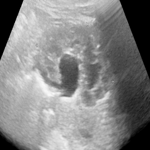

In [ ]:
data[0]

In [ ]:
import numpy as np
from PIL import Image

image_shape = (150, 150, 3)
# Создадим пустой numpy массив для хранения всех изображений
images_array = np.empty((len(data), *image_shape), dtype=np.uint8)

# Предположим, что у вас есть список `images_list` с PIL изображениями
# Преобразование изображений в numpy массив и сохранение их в массиве `images_array`
for i in range(len(data)):
    images_array[i] = np.array(data[i])

print("Массив изображений успешно создан.")

Массив изображений успешно создан.


In [ ]:
labels = np.array(labels)

In [ ]:
indicies = np.arange(len(images_array))

In [ ]:
len(images_array)

5230

In [ ]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(indicies, test_size=0.25, random_state=42, stratify= labels, shuffle=True)

val_df, test_df = train_test_split(temp_df, test_size=0.4, random_state=42, stratify=labels[temp_df], shuffle=True)

In [ ]:
print(f'Train size: {len(train_df)}')
print(f'Validation size: {len(val_df)}')
print(f'Test size: {len(test_df)}')

Train size: 3922
Validation size: 784
Test size: 524


In [ ]:
train_df

array([ 144, 2087, 4229, ..., 3346, 4845, 3541])

In [ ]:
train_images = images_array[train_df]
val_images = images_array[val_df]
test_images = images_array[test_df]

train_labels = labels[train_df]
val_labels = labels[val_df]
test_labels = labels[test_df]

In [ ]:
#import gc
#gc.collect()

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models


train_images = torch.tensor( train_images, dtype=torch.float32)
val_images = torch.tensor( val_images, dtype=torch.float32)
test_images = torch.tensor( test_images, dtype=torch.float32)

train_labels = torch.tensor( train_labels, dtype=torch.long)
val_labels = torch.tensor( val_labels, dtype=torch.long)
test_labels = torch.tensor( test_labels, dtype=torch.long)


# Преобразование данных в правильный формат
train_images = train_images.permute(0, 3, 1, 2) / 255.0
val_images = val_images.permute(0, 3, 1, 2) / 255.0
test_images = test_images.permute(0, 3, 1, 2) / 255.0

In [ ]:
#import gc
#gc.collect()

In [ ]:
pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.0/311.0 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import wandb
from torchvision.models import resnet50, ResNet50_Weights
from sklearn.metrics import precision_score, recall_score, f1_score
# Инициализация WandB
wandb.init(project="ResNet50")


# Загрузка предобученной ResNet50 и замена последнего полносвязного слоя //UNet - добавить, featute_pyramid_network
model = models.resnet50(weights=ResNet50_Weights.DEFAULT)
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 2)  # 2 нейрона для бинарной классификации
    #nn.Softmax(dim=1)  # Добавляем Softmax для получения вероятностей
)

# Перемещение модели на GPU (если доступно)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)
batch_size = 32
# Обучение модели
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i in range(0, len(train_images), batch_size):
        inputs = train_images[i:i+batch_size].to(device)
        labels = train_labels[i:i+batch_size].to(device)
        #print(inputs.device)  # Should print: 'cuda:0'
        #print(labels.device)  # Should print: 'cuda:0'

        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs.device)
        #_, outputs = torch.max(outputs, dim=1)
        #labels = labels.type(torch.LongTensor).to(outputs.device)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_images)
    wandb.log({"epoch": epoch + 1, "loss": epoch_loss})
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

    # Оценка модели на валидационных данных
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        outputs = model(val_images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += val_labels.size(0)
        correct += (predicted == val_labels.to(device)).sum().item()
        loss_val = criterion(outputs, val_labels.to(device))
    all_labels.extend(val_labels.cpu().numpy())
    all_predictions.extend(predicted.cpu().numpy())
    val_accuracy = 100 * correct / total
    wandb.log({"validation_accuracy": val_accuracy})
    print(f'Validation Accuracy: {val_accuracy:.2f}%')
    wandb.log({"validation_loss": loss_val})
    print(f'Validation_loss: {loss_val:.2f}')
    # Вычисление precision, recall и F1-меры
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)

    wandb.log({"precision": precision, "recall": recall, "f1_score": f1})
    print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

# Оценка модели на тестовых данных
model.eval()
correct = 0
total = 0
with torch.no_grad():
    outputs = model(test_images.to(device))
    _, predicted = torch.max(outputs.data, 1)
    total += test_labels.size(0)
    correct += (predicted == test_labels.to(device)).sum().item()

test_accuracy = 100 * correct / total
wandb.log({"test_accuracy": test_accuracy})
print(f'Test Accuracy: {test_accuracy:.2f}%')
wandb.finish()#weightedrandomsampler / датасет/ веса/ архитектура

cuda:0
Epoch 1/10, Loss: 0.0204
Validation Accuracy: 69.90%
Validation_loss: 0.60
Precision: 1.00, Recall: 0.01, F1 Score: 0.02
Epoch 2/10, Loss: 0.0158
Validation Accuracy: 69.90%
Validation_loss: 0.55
Precision: 0.71, Recall: 0.02, F1 Score: 0.04
Epoch 3/10, Loss: 0.0114
Validation Accuracy: 70.54%
Validation_loss: 0.52
Precision: 0.59, Recall: 0.11, F1 Score: 0.18
Epoch 4/10, Loss: 0.0081
Validation Accuracy: 74.62%
Validation_loss: 0.50
Precision: 0.68, Recall: 0.31, F1 Score: 0.43
Epoch 5/10, Loss: 0.0056
Validation Accuracy: 75.26%
Validation_loss: 0.51
Precision: 0.65, Recall: 0.41, F1 Score: 0.50
Epoch 6/10, Loss: 0.0036
Validation Accuracy: 76.02%
Validation_loss: 0.51
Precision: 0.64, Recall: 0.49, F1 Score: 0.55
Epoch 7/10, Loss: 0.0021
Validation Accuracy: 77.55%
Validation_loss: 0.50
Precision: 0.63, Recall: 0.64, F1 Score: 0.63
Epoch 8/10, Loss: 0.0011
Validation Accuracy: 75.13%
Validation_loss: 0.55
Precision: 0.57, Recall: 0.72, F1 Score: 0.64
Epoch 9/10, Loss: 0.0006


epoch,▁▂▃▃▄▅▆▆▇█
f1_score,▁▁▃▆▆▇████
loss,█▆▅▄▃▂▂▁▁▁
precision,█▄▂▃▃▂▂▁▁▁
recall,▁▁▂▄▅▅▇▇██
test_accuracy,▁
validation_accuracy,▁▁▂▅▆▇█▆▆▄
validation_loss,▅▃▂▁▁▁▁▃▆█
epoch,10
f1_score,0.64736
loss,0.00036


In [ ]:
pip install unet

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from unet import UNet
#from your_dataset import YourDataset

# Инициализация WandB
wandb.init(project="Unet")

train_loader = DataLoader(train_images, batch_size=16, shuffle=True, num_workers=4)
val_loader = DataLoader(val_images, batch_size=16, shuffle=False, num_workers=4)
test_loader = DataLoader(test_images, batch_size=16, shuffle=False, num_workers=4)

# Определение модели, функции потерь и оптимизатора
model = UNet(in_channels=3, out_channels=2)  # 2 канала для бинарной сегментации
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
    wandb.log({"epoch": epoch + 1, "loss": loss})
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}')
    # Оценка на валидационном наборе
    model.eval()
    with torch.no_grad():
        for images, masks in val_loader:
            images = images.to(device)
            masks = masks.to(device)
            outputs = model(images)
            # Вычислить метрики качества

# Разметка тестового набора
model.eval()
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        outputs = model(images)
        # Сохранить предсказанные маски

In [ ]:
import wandb

# Инициализация WandB
wandb.init(project="prob")


# Загрузка предобученной ResNet50 и замена последнего полносвязного слоя //UNet - добавить, featute_pyramid_network
model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # 2 класса

# Перемещение модели на GPU (если доступно)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 100
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, len(train_images), 32):
        inputs = train_images[i:i+32].to(device)
        labels = train_labels[i:i+32].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, outputs = torch.max(outputs, dim=1)

        loss = criterion(outputs.float(), labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_images)
    wandb.log({"epoch": epoch + 1, "loss": epoch_loss})
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# Оценка модели на валидационных данных
model.eval()
correct = 0
total = 0
with torch.no_grad():
    outputs = model(val_images.to(device))
    _, predicted = torch.max(outputs.data, 1)
    total += val_labels.size(0)
    correct += (predicted == val_labels.to(device)).sum().item()

val_accuracy = 100 * correct / total
wandb.log({"validation_accuracy": val_accuracy})
print(f'Validation Accuracy: {val_accuracy:.2f}%')

# Оценка модели на тестовых данных
model.eval()
correct = 0
total = 0
with torch.no_grad():
    outputs = model(test_images.to(device))
    _, predicted = torch.max(outputs.data, 1)
    total += test_labels.size(0)
    correct += (predicted == test_labels.to(device)).sum().item()

test_accuracy = 100 * correct / total
wandb.log({"test_accuracy": test_accuracy})
print(f'Test Accuracy: {test_accuracy:.2f}%')
wandb.finish()

ModuleNotFoundError: No module named 'wandb'

In [ ]:
# Инициализация WandB
wandb.init(project="prob")


# Загрузка предобученной ResNet50 и замена последнего полносвязного слоя //UNet - добавить, featute_pyramid_network
model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # 2 класса

# Перемещение модели на GPU (если доступно)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 100
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, len(train_images), 32):
        inputs = train_images[i:i+32].to(device)
        labels = train_labels[i:i+32].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, outputs = torch.max(outputs, dim=1)

        loss = criterion(outputs.float(), labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_images)
    wandb.log({"epoch": epoch + 1, "loss": epoch_loss})
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# Оценка модели на валидационных данных
model.eval()
correct = 0
total = 0
with torch.no_grad():
    outputs = model(val_images.to(device))
    _, predicted = torch.max(outputs.data, 1)
    total += val_labels.size(0)
    correct += (predicted == val_labels.to(device)).sum().item()

val_accuracy = 100 * correct / total
wandb.log({"validation_accuracy": val_accuracy})
print(f'Validation Accuracy: {val_accuracy:.2f}%')

# Оценка модели на тестовых данных
model.eval()
correct = 0
total = 0
with torch.no_grad():
    outputs = model(test_images.to(device))
    _, predicted = torch.max(outputs.data, 1)
    total += test_labels.size(0)
    correct += (predicted == test_labels.to(device)).sum().item()

test_accuracy = 100 * correct / total
wandb.log({"test_accuracy": test_accuracy})
print(f'Test Accuracy: {test_accuracy:.2f}%')
wandb.finish()



In [ ]:
# Инициализация WandB
wandb.init(project="prob")


# Загрузка предобученной ResNet50 и замена последнего полносвязного слоя //UNet - добавить, featute_pyramid_network
model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # 2 класса

# Перемещение модели на GPU (если доступно)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 100
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, len(train_images), 32):
        inputs = train_images[i:i+32].to(device)
        labels = train_labels[i:i+32].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, outputs = torch.max(outputs, dim=1)

        loss = criterion(outputs.float(), labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_images)
    wandb.log({"epoch": epoch + 1, "loss": epoch_loss})
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# Оценка модели на валидационных данных
model.eval()
correct = 0
total = 0
with torch.no_grad():
    outputs = model(val_images.to(device))
    _, predicted = torch.max(outputs.data, 1)
    total += val_labels.size(0)
    correct += (predicted == val_labels.to(device)).sum().item()

val_accuracy = 100 * correct / total
wandb.log({"validation_accuracy": val_accuracy})
print(f'Validation Accuracy: {val_accuracy:.2f}%')

# Оценка модели на тестовых данных
model.eval()
correct = 0
total = 0
with torch.no_grad():
    outputs = model(test_images.to(device))
    _, predicted = torch.max(outputs.data, 1)
    total += test_labels.size(0)
    correct += (predicted == test_labels.to(device)).sum().item()

test_accuracy = 100 * correct / total
wandb.log({"test_accuracy": test_accuracy})
print(f'Test Accuracy: {test_accuracy:.2f}%')
wandb.finish()